<a href="https://colab.research.google.com/github/anjalisuthar/ANN-for-binary-classification/blob/main/ANN_Impementation_on__Binary_Classification__problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#interview question

QUe 1: for which all algoritem **feature scaling is required**??

Ans:-required for:- ANN(artifical nural network) ,Linear Regression, logicstic regrassion, KNN , K Means
- which all alogritms requires : 
    - alogritems are  related to distance based: In distace based values is bigger so calculation take time  so we use for quick conversion
    -gredient descent: - its involved in linear , logistic regression
    - used when optimizer is invovles

-not nesseory for/ not required :-dession Tree, Rf random forest , xg boost


Que 2 : fit_transform why its apply only to traning data x_train not to test??
      
Que 3 : transform apply in test data X_test??

que 4: what is different between fit_transform v/s transform??

Ans: 2,3,4- fit_ transfrom and transform used in test data becouse of
             Avoid data leakage (another ans i need to search)


# Taking about kears and Tenserflow

-tansorflow is open source by google created by deep minds team

-pytourch is from facebook

-some thing same features in both

- before tenserflow 2.0 : tenserflow was separate and kears is basically a wrapper in which kearas use tenserflow api only,call simple function and use tenserflow . in this Phase we are install tenserflow separatly after the kears sparatly and the use

- after 2.0 : keras + tenserflow  is integrated

# what is black box v/s white box model
* in black box we can not moniter and see each weight its difficult, can not directly see how it is working intenally 


-random forest , ANN , CNN, RNN: black box  

- Desision tree , linear regression: white box


In [ ]:
!pip install tensorflow -gpu


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -g


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dset = pd.read_csv('/content/Churn_Modelling.csv')
#binary classification problem


Problem statement

we are going to predict whether customer  going to exit that perticular bank or any company whether all these products are there been use in a specific bank or whether they are going to just exit in a future case or not.

 so if you really prevent execulation like they do not want to quick the bank so we should definatly provide some more services.

 check wherther customer are exit or not.
 exit are dependent feature
 all others are independent feature.


In [ ]:
dset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the data set into independent and depended feature

# for independ feature
X = dset.iloc[:,3:13]     # iloc : index location

#for dependent feature
Y = dset.iloc[:,13]


**`dset.iloc[:,3:13]  `**:-using iloc feature i am going to use index location row and column wise.

I want all row denoted by 

formate iloc:

 **[all row: ,starting column index: ending colum index]**


i am goint to remove column 0,1,2 (i dont want rownumber , cust id, surname)


In [ ]:
X.head()   # all independet feature

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y   #see output/ dependent  feature use Y.head() also

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


#Feature convesion Phase started here



In [ ]:
#Feature Enginerring:
#Step 1: covert into catergorical feature means covert string to in/float
pd.get_dummies(X['Geography'], drop_first = True)


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


# feature Enginerring part:
-we care goint to handle  chatagorical features
covert into string to int/float

-Geography hase 3 value france,germany, spain : accoring to row index no whenever thoes data arrive to index no they covert like index 1 hase spain then assign 1 to spain all other are 0
this all coversion can done through OneHot Encorder
 
-for convestion we use onehotEncorder or dummies

-drop_first = true: it represent remove france , when ever france come in picture all other location- become 0 so we can say that, that index fall into france location(using 2 location data meaning mininizing data bt didnt loss the actual thing, we say that all 2 location become 0 the remaning(france ) become 1)


In [ ]:
# step 1.2 : coverted and assign lable
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)


In [ ]:
# step 2 : drop orignial feature
X=X.drop(['Geography', 'Gender'], axis =1)
 # drop 2 column axis =1: say that drop the column dont drop row

In [ ]:
X.head() # updated X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
# final concatenation done here  i m wring step how? in below section
# step 3 :  concate converted data which are stroed into lable to thoes data frame attech at end

X = pd.concat([X,geography,gender], axis =1)
X.head()  # update x


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#final concatenation
(i am describing above all ection when convaerstin stared)

-what happen here we are 1 st goint to conver gender and geograpy to string into int

- sencond drop original gender and geograpy feature which have String value

- assign converted feature to label so we can stored that converted data into vvariable

- 3 after droping original we use that converted data which is stored into varible and concate all converted feature to tables independed other features


# spiltting data set into Traning set and test set

In [ ]:


from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

# feature Scalling

( what is feature scaling why we use im written in 1 st section in interview que section)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   # initalize standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Standard scaler : its based on the Z-Score
                - supposed when ur data is normalized its bascially roted arround ur mean value with some standard derivetion to right and the left for that reason we use standard scaler


-min max scaler: apply into CNN :- we used to restrict between 0 to 1 -1 to +1





In [ ]:
X_train     # see that all transformted data

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape   # chack out shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

 
## part 2  Create ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

- **Sequential** : - means we have a block into that block we have 

           * input layer :11 input node 
           * hidden layer : some nurons
           * another hidden layer : some nurons 
          - output layer : one output node

-we have that block and we are going to use seuentaially one by one so we use a sub library Sequential

-forwork and bakwork propogation done by Sequentials 

- **Dense Layer**: able to create circules in all layers

- **Droup out Layer** : we have inter-connected multi layer nural n/w layer . that nurons use to sloved complex problem. we are doning forword and backword propogation we are continuesly monitering the loss function and help of the optimizer will alwes come to a global minima in some time.
- what the problrm that entire nural n/w lead to overfitting.
- what is overfitting : means for traing my accuracy is good/high bt for testmy accuracy is going dowen
  * for Reduce Overfitting we use Droup out layer
  * Droup out is just a regularization paramter in ML
  * n1 noum, n2 noum ???(search by userself)
* Droup Out do : for every layer ex my droup out ratio is 0.3 is indicated that 30%  of entired neuron that are present will get deactivated while traning.
* ex: drop out ration is 0.3(30%) / 0.5 (50%) is 1 neuron out of all this will get deactivated during traning while the forword and backword prapogation will happening you see that this will get deactivated.
* selection of deactivation is randomly.
* cut out all the layels after deactivation of nurons / no need for stay will dead neurons


In [ ]:
# initalize ANN
classifire = Sequential()

In [ ]:
# adding i/p layer
# how to now how may i/p are there ?? 
# go to X_tran.shape see( some no, i/p layer no) (8000, 11)
# we hed 11 i/p layers/ units

classifire.add(Dense(units=11,activation='relu'))

In [ ]:
#adding 1 st hidden layer
# what ever no/unit we are assine not fix (6/7/8/5) anything

classifire.add(Dense(units=6,activation='relu'))

# adding droup out layer
classifire.add(Dropout(0.3))


In [ ]:
# adding 2 nd hidden layer

classifire.add(Dense(units=6,activation='relu'))

# adding droup out to every layer
classifire.add(Dropout(0.2))

In [ ]:
#adding output layer
# binary classifiction problem so we use 1 nueron for o/p layer
# activation function for binary classification problem : sigmoid 

classifire.add(Dense(1,activation='sigmoid'))

Train entire NN

In [ ]:
# set up learning rate for optimizer
# form Adem optimizer we can set learning rate
# we can directly difine optimize ='adam' : its automatically set learning rate 

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)


* compile all nn , apply optimizer = adam most popular
* loss function for binary classification = entropy
* metric = accuracu metrics

* classifire.compile(optimizer ='adam',loss ='binary_crossentropy', metrics['accuracy'])
* form Adem optimizer they set learning rate by defort
* we can directly difine optimize ='adam' : its automatically set learning rate 

* or set up learning rate by user (difine in below section)

In [ ]:
classifire.compile(optimizer = opt,loss ='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# early stopping :- its make sure that when the 
#accuracy is not at all increasing
#automatically traning of the modle is stop
# copying code from: early Stoping form keras and modifie some

import tensorflow as tf

early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


Arguments
* monitor: Quantity to be monitored.
* min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
* patience: Number of epochs with no improvement after which training will be stopped.
* verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
* mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
* baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
* restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.


In [ ]:
model_history = classifire.fit(X_train,Y_train,validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4703 - accuracy: 0.7966 - val_loss: 0.4060 - val_accuracy: 0.8156
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8250 - val_loss: 0.3785 - val_accuracy: 0.8387
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8354 - val_loss: 0.3860 - val_accuracy: 0.8413
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3824 - accuracy: 0.8425 - val_loss: 0.3730 - val_accuracy: 0.8436
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3852 - accuracy: 0.8405 - val_loss: 0.3778 - val_accuracy: 0.8304
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3808 - accuracy: 0.8401 - val_loss: 0.3797 - val_accuracy: 0.8440
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3787 - accuracy: 0.8391 - val_loss: 0.3805 - val_accuracy:

**validatation_split** :- how many data you are going to validate is 0.33
                      - so they take 0.67 data its take for traning

In [ ]:
model_history.history.keys()  # what parameter we are specificly focuse on

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

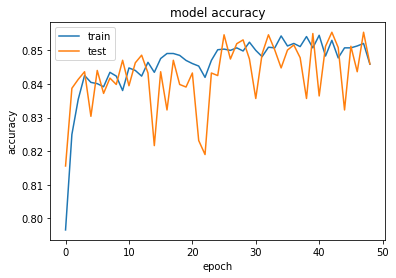

In [ ]:
#Plot summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')    # train and lest label in a graph uper left corner
plt.show()

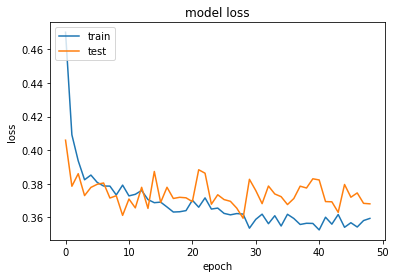

In [ ]:
#Plot summarize history for accuracy

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')    # train and lest label in a graph uper left corner
plt.show()

## part 3: prediction for the test data

In [ ]:
#predicting the test set result

y_pred = classifire.predict(X_test)
y_pred = (y_pred > 0.5)


In [ ]:
# make the confusion materix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm


array([[1578,   17],
       [ 278,  127]])

In [ ]:
# calculate accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,y_pred)
score

0.8525

In [ ]:
# get the weights

classifire.get_weights()

[array([[-1.6463861 ,  0.65113294,  0.11397437, -0.07001648,  0.34462866,
         -0.47386017,  0.12863296, -0.05280837,  0.25117612,  0.27052334,
         -0.04384866],
        [-0.08306774, -2.803263  , -2.61559   ,  2.672087  , -1.7826586 ,
         -0.11297461,  0.21512374,  3.0084167 ,  1.177258  ,  1.6314285 ,
         -1.4111462 ],
        [ 0.47674537, -0.45338985, -0.45347407,  0.33216745, -0.9348624 ,
          0.3107361 ,  0.19303192, -0.46392053, -0.04314598, -0.52296865,
          1.4424461 ],
        [ 0.10232304, -0.8570135 , -0.33499017, -0.1976479 ,  0.7182953 ,
         -2.1488304 , -3.5585845 ,  0.49768618,  1.1501963 , -0.6917802 ,
         -2.25496   ],
        [-0.71902806, -0.21033429,  0.16330591, -0.35992423, -0.5994209 ,
          1.1813368 , -3.8993933 , -1.931466  ,  3.5164628 , -0.66801554,
         -0.7979431 ],
        [-0.29356375,  0.06484547, -1.163419  , -0.33804342,  0.17304441,
         -0.13554691, -0.19901934, -1.0473086 , -0.00540939,  0.3571894